# **Data Analyst Job Postings**


Data science is a rapidly growing field in the tech industry, and LinkedIn is a popular platform for finding job opportunities in this domain.

In this project, we will use a dataset from kaggle.com that provides valuable insights into data analyst job postings, including the required skills and software proficiency sought by employers.


## Objectives


To gain valuable insights from this dataset, we will perform the below tasks:


* Extract information from kaggle web site 
* Load the extracted data in a dataframe.
* Explore the dataset.
* Get familiar with the data types in the dataset.
* Get information about the number of jobs in the dataset per Location and Job level.
* Get information about the number of jobs per Location and per job type.
* Explore the share of job level.
* Explore the share of job type.

## Load the dataset


Firstly let's import the required libraries.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is available as a CSV file for download at the https://www.kaggle.com/datasets/asaniczka/data-analyst-job-postings.

We downloaded the dataset and saved it into our project directory.


Let's load the data into a dataframe.


In [2]:
# we use read_csv to load the dataset into a dataframe
df = pd.read_csv("D:\Cours\Data\My Data Analyst Portfolio\Python Projects\Data Analyst Job Postings\postings.csv") 

## Explore the data set


To make sure the data set has been loaded properly and get a feel of how the dataset will look, we print the top 5 rows of the dataset.


In [3]:
#head() will print the top 5 rows of the dataset
df.head()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop..."
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software..."
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a..."
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce..."


## Find out the number of rows and columns


Let's start by exploring the numbers of rows and columns of data in the dataset.


In [4]:
# shape[0] gives the number of row in the dataset
num_rows = df.shape[0]
print("Number of row in the dataset: ",num_rows)

Number of row in the dataset:  12894


Print the number of columns in the dataset.


In [5]:
# shape[1] gives the number of columns in the dataset
num_cols = df.shape[1]
print("Number of columns in the dataset: ",num_cols)

Number of columns in the dataset:  11


## Identify the data types of each column


We then explore the dataset to identify the data types of each column.


In [6]:
# info() prints the datatype of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12894 entries, 0 to 12893
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       12894 non-null  object
 1   company         12894 non-null  object
 2   job_location    12894 non-null  object
 3   job_link        12894 non-null  object
 4   first_seen      12894 non-null  object
 5   search_city     12894 non-null  object
 6   search_country  12894 non-null  object
 7   job level       12894 non-null  object
 8   job_type        12894 non-null  object
 9   job_summary     12851 non-null  object
 10  job_skills      12705 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


The dataset is the result of a world wide survey. 

Let's print from how many unique countries people are looking for a data analyst job.


In [7]:
# nunique() 
num_distinct_country = df['search_country'].nunique()
print("Number of unique country:", num_distinct_country)

Number of unique country: 4


Let's print from how many unique city people are looking for a data analyst job.


In [8]:
num_distinct_city = df['search_city'].nunique()
print("Number of unique city:", num_distinct_city)

Number of unique city: 834


Now let's find out how many unique job locations are in the dataset

In [9]:
num_distinct_job_location = df['job_location'].nunique()
print("Number of job Location:", num_distinct_job_location)

Number of job Location: 2446


## Number of jobs in the dataset per Location and Job level

We create a new dataframe called jobs_per_loc_level that contains the number of jobs per location and per job level. The groupby function is used to group the rows by 'jobs_per_loc_level' and 'job level', and the size function is used to count the number of rows in each group. The reset_index function is used to convert the groupby object back into a dataframe.

In [10]:
# Group the dataframe by 'job_location' and 'job level' and count the number of jobs in each group
jobs_per_loc_level = df.groupby(['job_location', 'job level']).size().reset_index(name='num_jobs')

# We then Print the first 10 rows of the resulting dataframe
print(jobs_per_loc_level.head(10))

                              job_location   job level  num_jobs
0      Abbey Wood, England, United Kingdom  Mid senior         1
1  Abbots Salford, England, United Kingdom  Mid senior         1
2                               Abbott, TX   Associate         1
3                               Abbott, TX  Mid senior         2
4              Aberdeen Proving Ground, MD   Associate         1
5              Aberdeen Proving Ground, MD  Mid senior         6
6                             Aberdeen, MD  Mid senior         3
7       Aberdeen, Scotland, United Kingdom  Mid senior         6
8  Aberdeenshire, Scotland, United Kingdom  Mid senior         1
9        Abingdon, England, United Kingdom   Associate         1


## Number of jobs in the dataset per Location and Job type

We do the same thing for as the task above, creating a new dataframe named, jobs_per_loc_type.

In [11]:
# Group the dataframe by 'job_location' and 'job_type' and count the number of jobs in each group
jobs_per_loc_type = df.groupby(['job_location', 'job_type']).size().reset_index(name='num_jobs')

# We then Print the first 10 rows of the resulting dataframe
print(jobs_per_loc_type.head(10))

                              job_location job_type  num_jobs
0      Abbey Wood, England, United Kingdom   Hybrid         1
1  Abbots Salford, England, United Kingdom   Onsite         1
2                               Abbott, TX   Onsite         3
3              Aberdeen Proving Ground, MD   Hybrid         3
4              Aberdeen Proving Ground, MD   Onsite         4
5                             Aberdeen, MD   Hybrid         1
6                             Aberdeen, MD   Onsite         2
7       Aberdeen, Scotland, United Kingdom   Hybrid         1
8       Aberdeen, Scotland, United Kingdom   Onsite         5
9  Aberdeenshire, Scotland, United Kingdom   Hybrid         1


## Let's explore the share of job level.

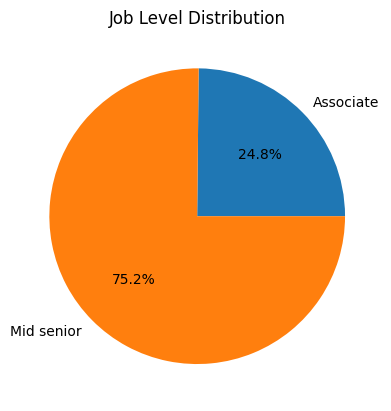

In [12]:
# Group the dataframe by 'job level' and count the number of jobs in each group
jobs_per_level = df.groupby('job level').size().reset_index(name='num_jobs')

# Create a pie chart of the grouped data
plt.pie(jobs_per_level['num_jobs'], labels=jobs_per_level['job level'], autopct='%1.1f%%')

# Add a title to the chart
plt.title('Job Level Distribution')

# Display the chart
plt.show()

## Let's explore the share of job type.

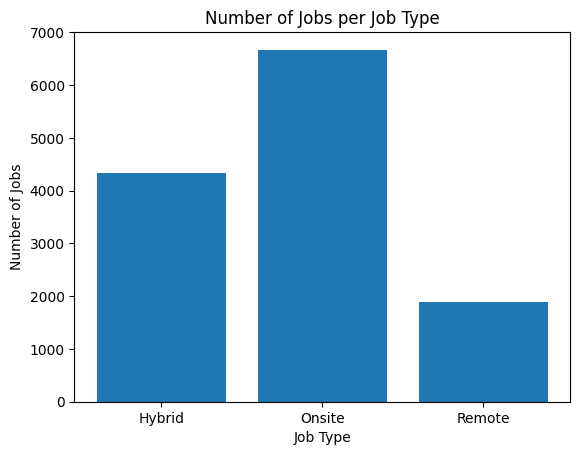

In [13]:
# Group the dataframe by 'job_type' and count the number of jobs in each group
jobs_per_type = df.groupby('job_type').size().reset_index(name='num_jobs')

# Create a bar chart of the grouped data
plt.bar(jobs_per_type['job_type'], jobs_per_type['num_jobs'])

# Add labels and title to the chart
plt.xlabel('Job Type')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs per Job Type')

# Display the chart
plt.show()

## Authors


Bruno WOUAMBA